## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

#### Question 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def createData(noise, N=50):
    np.random.seed(100) #setting seed for replicability
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)



**Question 1.2**

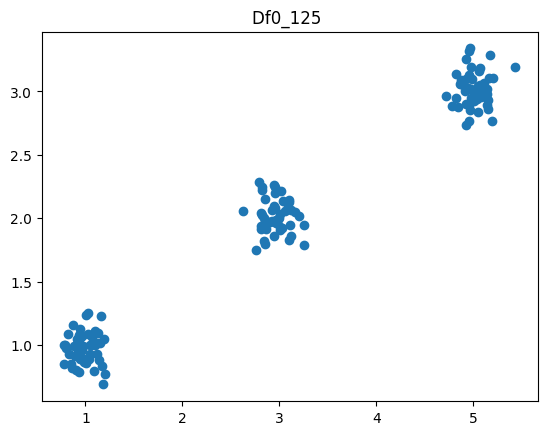

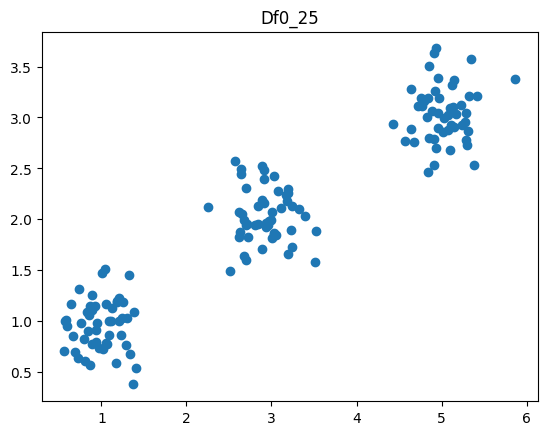

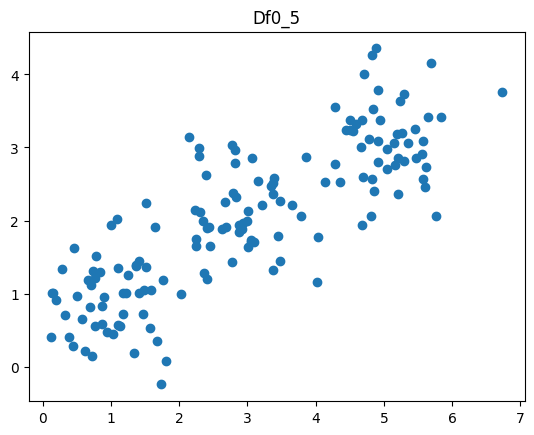

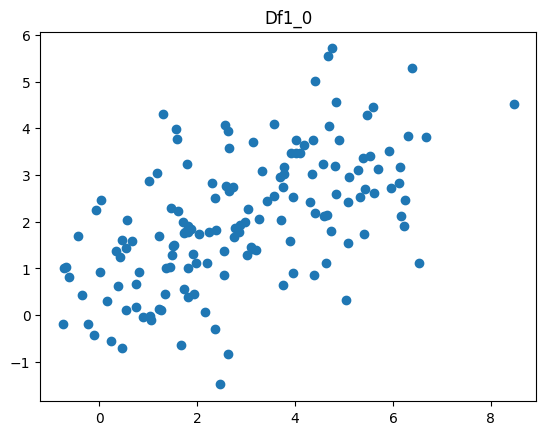

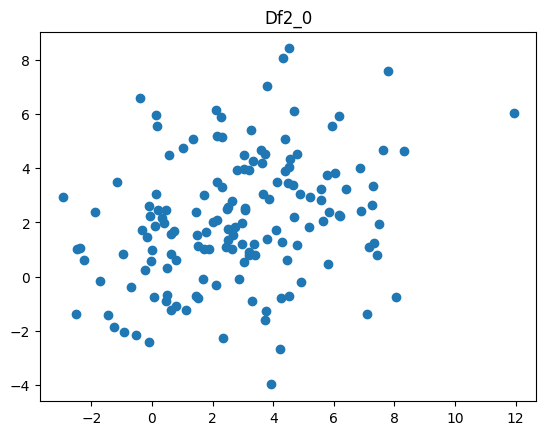

In [4]:
plt.scatter(data = df0_125, x= "x1", y="x2")
plt.title("Df0_125 ")
plt.show()

plt.scatter(data = df0_25, x= "x1", y="x2")
plt.title("Df0_25")
plt.show()

plt.scatter(data = df0_5, x= "x1", y="x2")
plt.title("Df0_5")
plt.show()

plt.scatter(data = df1_0, x= "x1", y="x2")
plt.title("Df1_0")
plt.show()

plt.scatter(data = df2_0, x= "x1", y="x2")
plt.title("Df2_0")
plt.show()

As the noise increases, the clusters become lesss and less distinct. By the time we reach 1.0, the individual clusters can not be seen anymore.

**Question 1.3**

/tmp/ipykernel_77534/4066581017.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric=df.drop(columns=["group"]) #remove categorical column


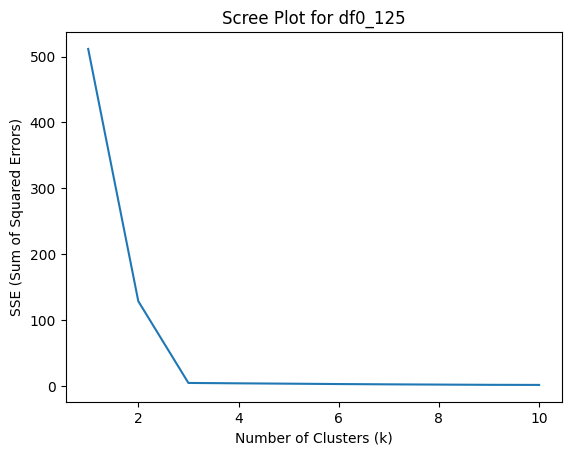

/tmp/ipykernel_77534/4066581017.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric=df.drop(columns=["group"]) #remove categorical column


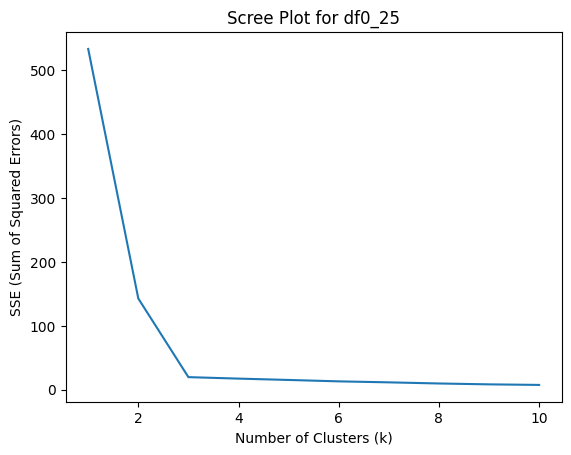

/tmp/ipykernel_77534/4066581017.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric=df.drop(columns=["group"]) #remove categorical column


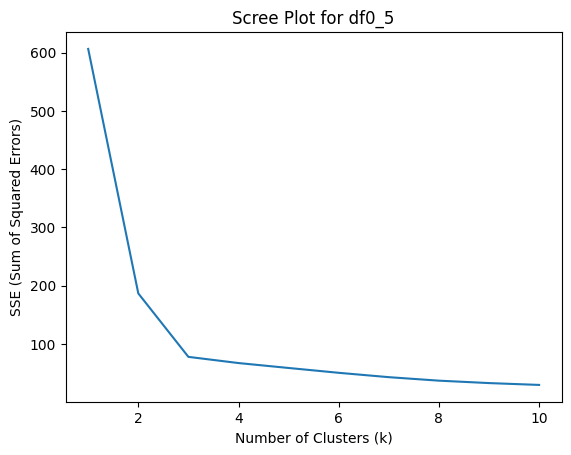

/tmp/ipykernel_77534/4066581017.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric=df.drop(columns=["group"]) #remove categorical column


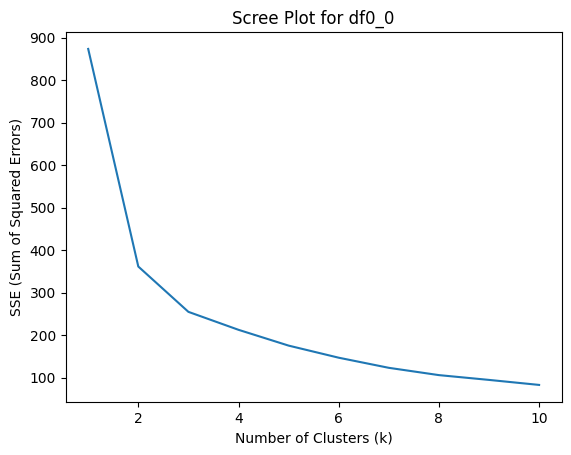

/tmp/ipykernel_77534/4066581017.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numeric=df.drop(columns=["group"]) #remove categorical column


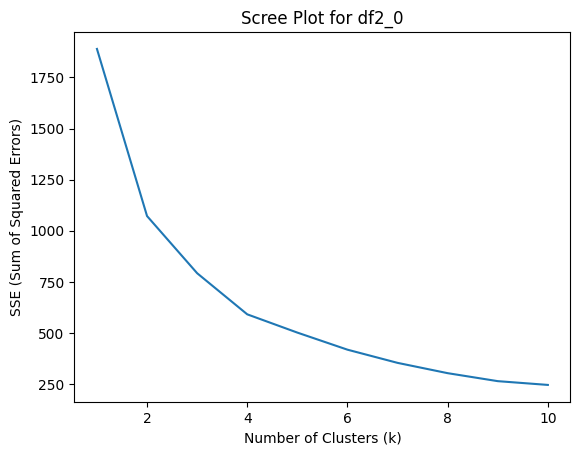

In [5]:
from sklearn.cluster import KMeans #import kmc

k_bar=10

def kmeans_scree_plot(df, title):
    df.numeric=df.drop(columns=["group"]) #remove categorical column
    SSE=[] #to store training error

    for k in range(k_bar):
        model=KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)#create a model for k
        model=model.fit(df.numeric)
        SSE.append(model.inertia_) #record the sum of squared error for k in the SSE vector

    sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE (Sum of Squared Errors)")
    plt.title(title)
    plt.show()

kmeans_scree_plot(df0_125, 'Scree Plot for df0_125')
kmeans_scree_plot(df0_25, 'Scree Plot for df0_25')
kmeans_scree_plot(df0_5, 'Scree Plot for df0_5')
kmeans_scree_plot(df1_0, 'Scree Plot for df0_0')
kmeans_scree_plot(df2_0, 'Scree Plot for df2_0')


As the noise increases, the "elbow" of the plot becomes less defined and gets smoothed out. The SSE become larger as the noise becomes larger, this means that it is harder to definitively select a k because there's no obvious point where adding clusters stop significantly improving k.

**Question 1.4**

The elbow shows the optimal number of clusters where adding more clusters no onger provides a significant reduction in SSE. As k increases, SSE decreases. In low-noise datasets like df_0125, the elbow is clear and sharp. As it increased like from df0_125 to df1_0, the SSE values increase becuase the points are more dispersed; this flattens out the elbow.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

#### Question 2

**Question 2.1**

In [19]:
election = pd.read_csv("data/2022 election cycle fundraising.csv")
print(election.head())
election.dtypes

   index              Member       Party       State Chamber       Raised  \
0      0  Abigail Spanberger  Democratic    Virginia   House   $7,719,396   
1      1      Adam Kinzinger  Republican    Illinois   House   $2,192,741   
2      2         Adam Schiff  Democratic  California   House  $20,993,041   
3      3          Adam Smith  Democratic  Washington   House   $1,211,111   
4      4        Adrian Smith  Republican    Nebraska   House   $1,617,611   

         Spent Cash on Hand Debts  
0   $7,449,678     $851,851    $0  
1   $1,243,502   $2,472,888    $0  
2  $13,957,854  $20,942,888    $0  
3   $1,173,466     $623,472    $0  
4   $1,664,674   $1,098,579    $0  


index            int64
Member          object
Party           object
State           object
Chamber         object
Raised          object
Spent           object
Cash on Hand    object
Debts           object
dtype: object

We'll handle this cleaning by making the Raised, Spent, Cash on Hand, and Debts variables numerics. I'll handle this by removing the dollar signs and commas.

In [20]:
#cleaning Raised
clean_election = election
clean_election['Raised'] = clean_election['Raised'].str.replace("$", "").str.replace(",", "").astype(float)

#cleaning Spent
clean_election['Spent'] = clean_election['Spent'].str.replace("$", "").str.replace(",", "").astype(float)

#cleaning Cash on Hand
clean_election['Cash on Hand'] = clean_election['Cash on Hand'].str.replace("$", "").str.replace(",", "").astype(float)

#cleaning Debts
clean_election['Debts'] = clean_election['Debts'].str.replace("$", "").str.replace(",", "").astype(float)
election.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


**Question 2.2**

In [47]:
def maxmin(x): #a max min scaler function
    x=(x-min(x))/(max(x)-min(x))
    return x

min_Spent = min(clean_election.loc[:,'Spent'])#create normalizations and add to df
max_Spent = max(clean_election.loc[:,'Spent'])
min_Raised = min(clean_election.loc[:,'Raised'])
max_Raised = max(clean_election.loc[:,'Raised'])

X = clean_election.loc[:, ['Spent', 'Raised']]
X= X.apply(maxmin)
X.head()


,Spent,Raised
0,0.098074,0.103512
1,0.016371,0.040686
2,0.183753,0.254404
3,0.015449,0.029527
4,0.021915,0.034148


Length of clean_election: 537, Length of X: 537


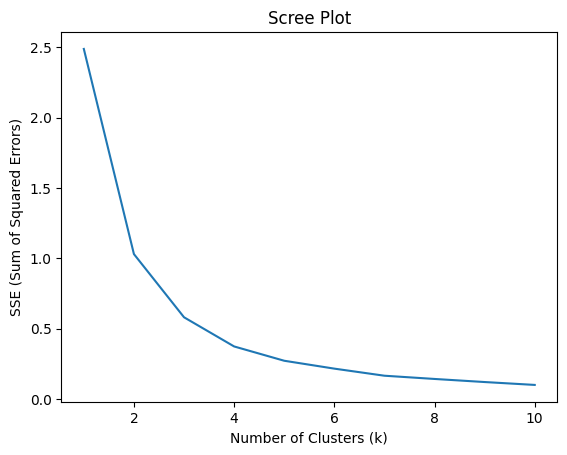

In [48]:
#clean_election[['Raised', 'Spent']] = clean_election[['Raised', 'Spent']].apply(pd.to_numeric, errors='coerce')
#clean_election = clean_election.dropna(subset=['Raised', 'Spent']).reset_index(drop=True)

#X = clean_election[['Spent', 'Raised']]
k_bar=10

print(f"Length of clean_election: {len(clean_election)}, Length of X: {len(X)}")

def kmeans_scree_plot(df, title):
    SSE=[]
    for k in range(1, k_bar+1):
        
        model=KMeans(n_clusters=k+1, max_iter=300, n_init=10, random_state=0)#create a model for k
        model=model.fit(df)
        SSE.append(model.inertia_) #record the sum of squared error for k in the SSE vector

    sns.lineplot(x=np.arange(1, k_bar + 1), y=SSE)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE (Sum of Squared Errors)")
    plt.title(title)
    plt.show()

kmeans_scree_plot(X, 'Scree Plot')
#kmeans_scree_plot(clean_election['Spent'], 'Scree Plot for Spent')

Optiomal K is when K=3

Text(0.5, 1.0, 'Scatter Plot of Raised vs Spent')

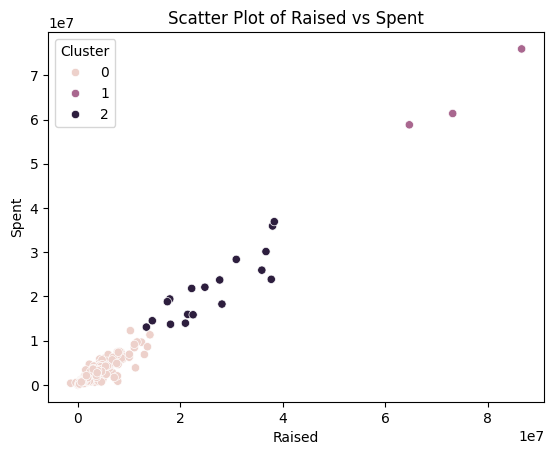

In [49]:
optimal_k = 3
kmeans=KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
clean_election['Cluster'] = kmeans.fit_predict(X)

sns.scatterplot(data=clean_election, x='Raised', y='Spent', hue='Cluster')
plt.title("Scatter Plot of Raised vs Spent")

In [50]:
print(clean_election['Cluster'].value_counts())
length = clean_election['Cluster'].size
for i in range(length):
    if (clean_election['Cluster'][i]==1):
        print(f"Cluster 1: ", clean_election['Member'][i])

for i in range(length):
    if (clean_election['Cluster'][i]==2):
        print(f"Cluster 2: ", clean_election['Member'][i])

Cluster
0    516
2     18
1      3
Name: count, dtype: int64
Cluster 1:  Mark Kelly
Cluster 1:  Raphael Warnock
Cluster 1:  Val Demings
Cluster 2:  Adam Schiff
Cluster 2:  Catherine Cortez Masto
Cluster 2:  Chuck Schumer
Cluster 2:  Dan Crenshaw
Cluster 2:  John Kennedy
Cluster 2:  Katie Porter
Cluster 2:  Kevin McCarthy
Cluster 2:  Maggie Hassan
Cluster 2:  Marco Rubio
Cluster 2:  Michael Bennet
Cluster 2:  Nancy Pelosi
Cluster 2:  Patty Murray
Cluster 2:  Rand Paul
Cluster 2:  Ron Johnson
Cluster 2:  Steve Scalise
Cluster 2:  Ted Cruz
Cluster 2:  Tim Ryan
Cluster 2:  Tim Scott


From the Raised vs. Spent graph, you can see that polititions in cluster 0 and 2 had the lowest amounts in raising and spending. The smallest clusters by size are clusters 1 and 2. Politicians in cluster 1 include Mark Kelly, Raphael Warnock, Val Demings. Politicians in cluster 2 include John Kennedy, Marco Rubio, Ted Cruz, etc.

In [51]:
clean_election.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,2
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0


**Question 2.3**

In [52]:
min_COH = min(clean_election.loc[:,'Cash on Hand'])#create normalizations and add to df
max_COH = max(clean_election.loc[:,'Cash on Hand'])
min_Debts= min(clean_election.loc[:,'Debts'])
max_Debts = max(clean_election.loc[:,'Debts'])

X2 = clean_election.loc[:, ['Cash on Hand', 'Debts']]
X2= X2.apply(maxmin)
X2.head()

,Cash on Hand,Debts
0,0.040154,0.0
1,0.111166,0.0
2,0.920268,0.0
3,0.030150,0.0
4,0.050962,0.0


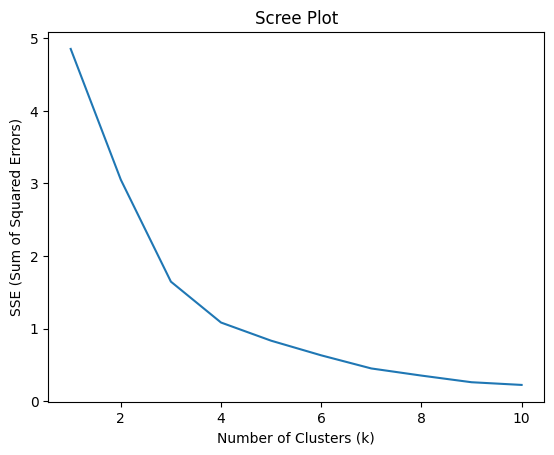

In [53]:
kmeans_scree_plot(X2, 'Scree Plot')


Optimal K when K = 4

Text(0.5, 1.0, 'Scatter Plot of Cash on Hand vs Debts')

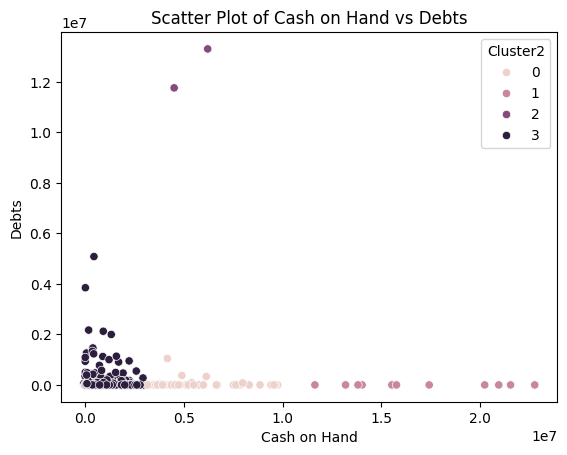

In [62]:
optimal_k2 = 4
kmeans=KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
clean_election['Cluster2'] = kmeans.fit_predict(X2)

sns.scatterplot(data=clean_election, x='Cash on Hand', y='Debts', hue='Cluster2')
plt.title("Scatter Plot of Cash on Hand vs Debts")

In [63]:
clean_election.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cluster,Cluster2
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0,0,3
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0,0,3
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,2,1
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0,0,3
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0,0,3


In [64]:
print(clean_election['Cluster2'].value_counts())
for i in range(length):
    if (clean_election['Cluster2'][i]==1):
        print(f"Cluster 1: ", clean_election['Member'][i])

for i in range(length):
    if (clean_election['Cluster2'][i]==2):
        print(f"Cluster 2: ", clean_election['Member'][i])

Cluster2
3    460
0     64
1     11
2      2
Name: count, dtype: int64
Cluster 1:  Adam Schiff
Cluster 1:  Chuck Schumer
Cluster 1:  John Kennedy
Cluster 1:  John Thune
Cluster 1:  Josh Gottheimer
Cluster 1:  Katie Porter
Cluster 1:  Lindsey Graham
Cluster 1:  Mark Kelly
Cluster 1:  Raja Krishnamoorthi
Cluster 1:  Raphael Warnock
Cluster 1:  Tim Scott
Cluster 2:  David Trone
Cluster 2:  Ron Johnson


There are some politicians that are in the same smallest clusters. This could be because they raised and spent a lot of money and are in debts. For example, John Kennedy appears in both of the smallest cluster groups. The politicans who are in the most debts are David Trone and Ron Johnson. Ron Johnson appeared in cluster 2 when we graphed raised and spent in the last question.

**Question 2.4**

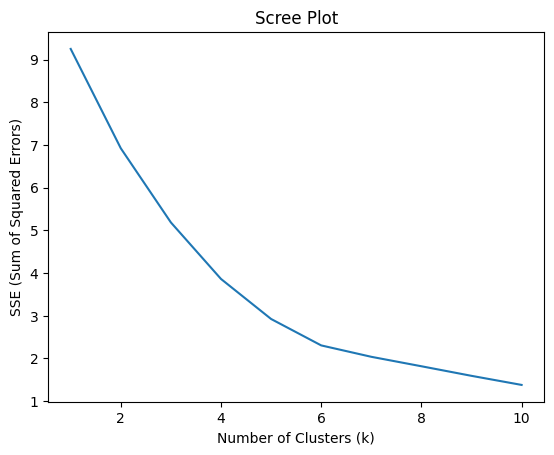

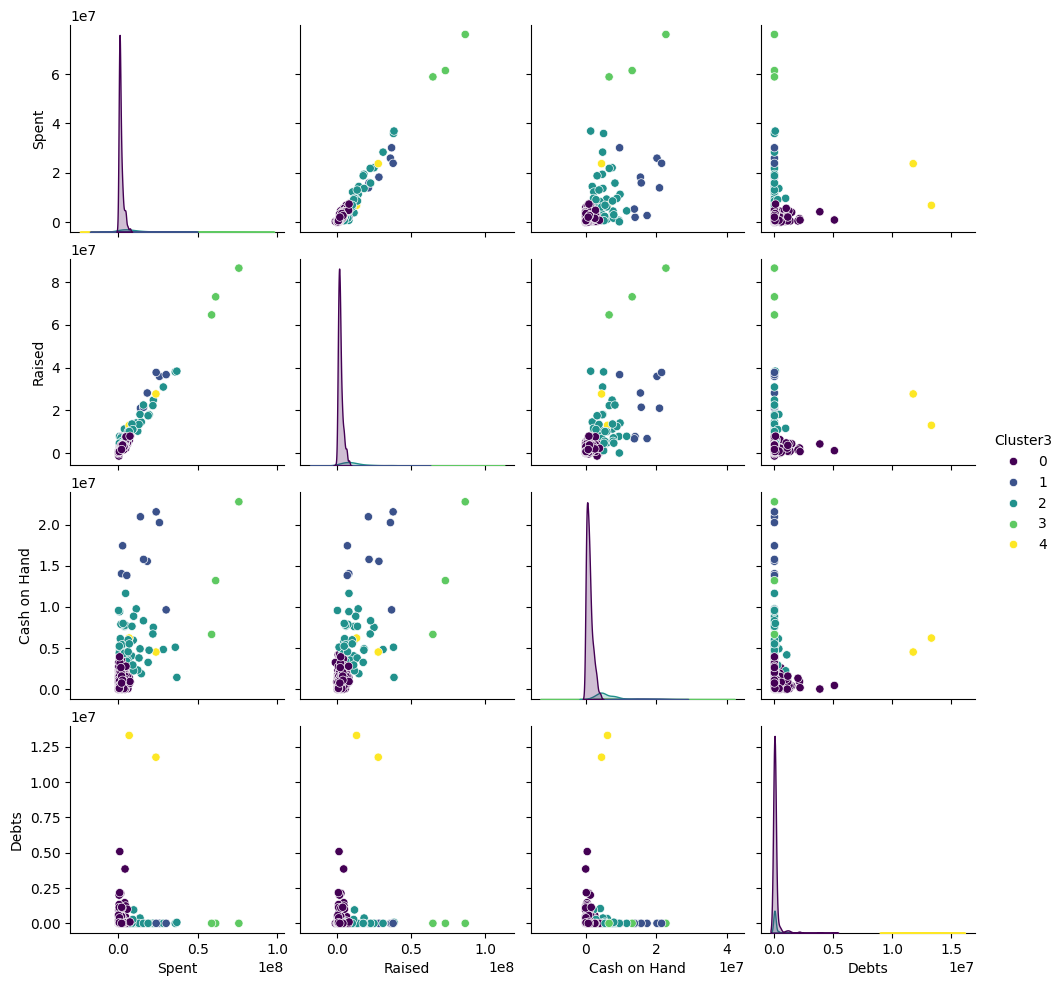

In [72]:
X3 = clean_election.loc[:, ['Spent', 'Raised', 'Cash on Hand', 'Debts']]
X3= X3.apply(maxmin)
#X3.head()

kmeans_scree_plot(X3, 'Scree Plot')

#k means
optimal_k3 = 5
kmeans = KMeans(n_clusters=optimal_k3, max_iter=300, n_init=10, random_state=0)
clean_election["Cluster3"] = kmeans.fit_predict(X3)

sns.pairplot(clean_election, vars=['Spent', 'Raised', 'Cash on Hand', 'Debts'], hue="Cluster3", palette="viridis")


My results show a more holistc view than the first two analysis. For example, politicians that spent more have more debts and those who had a good amount of cash on hand also had a lot of debts. There are more nuanced clusters. Some politicians who previously looked similar, may now be further distiguished by their remaining cash or debt. The clusters are pretty refined.

**Question 2.5**

The k-means algorithm effectively groups politicians with similar financial characteristics. These cluster could help campaign strategies and spending based on the group characteristics.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?